# Text Classsification

In [1]:
import glob
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim

In [3]:
# pip install pyLDAvis

In [4]:
# pip install gensim

# Using Content Classify news articles into different categories

# Reading Each Folder

# Bussiness

In [3]:
path = 'D:\\Captone project\\Capstone project\\scrapy\\Business\\'
all_files = glob.glob(path + '/*.csv')

li=[]
for file in all_files:
    df=pd.read_csv(file,index_col=None,header=0,encoding='unicode_escape')
    li.append(df)
frame=pd.concat(li,axis=0,ignore_index=True)
df1=frame.drop(['link','link-href','links','links-href','web-scraper-order','web-scraper-start-url'],axis=1)
df1.head()
df1.insert(2,'class','business')
df1.head()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\io\parsers.py:1995: DeprecationWarning: invalid escape sequence '\ '
  data = self._reader.read(nrows)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


content  \
0  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  NEW DELHI: The telecom department has not refe...   
3  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines     class  
0  Airtel, RIL, 3 others may submit bids for RCom...  business  
1  Ujjivan Small Finance Bank IPO garners strong ...  business  
2  Not referred floor price issue to Trai: DoT so...  business  
3  Ujjivan Small Finance Bank IPO subscribed 170 ...  business  
4                 Aditya Ghosh elevated to Oyo board  business

In [4]:
frame.head()

content  \
0  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  NEW DELHI: The telecom department has not refe...   
3  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines  \
0  Airtel, RIL, 3 others may submit bids for RCom...   
1  Ujjivan Small Finance Bank IPO garners strong ...   
2  Not referred floor price issue to Trai: DoT so...   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...   
4                 Aditya Ghosh elevated to Oyo board   

                                                link  \
0  Airtel, RIL, 3 others may submit bids for RCom...   
1  Ujjivan Small Finance Bank IPO garners strong ...   
2  Not referred floor price issue to Trai: DoT so...   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...   
4                 Aditya Ghosh elevated to Oyo board   

                                           link-href links links-href  \
0  https://timesofindia.indiatimes.com/business/i...   NaN        NaN   
1  https://timesofindia.indiatimes.com/business/i...   NaN        NaN   
2  https://timesofindia.indiatimes.com/business/i...   NaN        NaN   
3  https://timesofindia.indiatimes.com/business/i...   NaN        NaN   
4  https://timesofindia.indiatimes.com/business/i...   NaN        NaN   

  web-scraper-order                              web-scraper-start-url  
0   1575899980-1203  https://timesofindia.indiatimes.com/business/i...  
1   1575956852-1643  https://timesofindia.indiatimes.com/business/i...  
2   1575905090-1243  https://timesofindia.indiatimes.com/business/i...  
3   1575956987-1660  https://timesofindia.indiatimes.com/business/i...  
4   1575955746-1518  https://timesofindia.indiatimes.com/business/i...

In [5]:
df1.shape

(10462, 3)

# Entertainment

In [6]:
path = 'D:\\Captone project\\Capstone project\\scrapy\\Entertainment\\'
all_files = glob.glob(path + '/*.csv')

li=[]
for file in all_files:
    df=pd.read_csv(file,index_col=None,header=0,encoding='unicode_escape')
    li.append(df)
frame2=pd.concat(li,axis=0,ignore_index=True)
df2=frame2.drop(['web-scraper-order','web-scraper-start-url','links','links-href'],axis=1)
df2.insert(2,'class','Entertainment')
df2.head()

headlines  \
0  Koffee With Karan 6 preview: Kartik Aaryan, Kr...   
1  UMG pre-Grammy showcase features Post Malone, ...   
2  YouTube star Lilly Singh shares new photos fro...   
3  My Name Is RaGa teaser: This Rahul Gandhi biop...   
4  Director Bala reveals why he is no longer helm...   

                                             content          class  
0  Luka Chuppi actors Kartik Aaryan and Kriti San...  Entertainment  
1  Post Malone, who is competing for record and a...  Entertainment  
2  Priyanka Chopra and Nick Jonasâ wedding was ...  Entertainment  
3  Indian cinema has seen a flurry of politics-ti...  Entertainment  
4  National Award-winning director Bala on Saturd...  Entertainment

In [7]:
df2.shape

(10241, 3)

# Sports

In [8]:
path = 'D:\\Captone project\\Capstone project\\scrapy\\Sport\\'
all_files = glob.glob(path + '/*.csv')

li=[]
for file in all_files:
    df=pd.read_csv(file,index_col=None,header=0,encoding='unicode_escape')
    li.append(df)
frame3=pd.concat(li,axis=0,ignore_index=True)
df3=frame3.drop(['web-scraper-order','web-scraper-start-url','links','links-href'],axis=1)
df3.insert(2,'class','Sports')
df3.head()

headlines  \
0  Rex Singh 's 8 for 22 puts Manipur in strong p...   
1  Super Bowl LII 2018: Key Highlights from US Ba...   
2  Ranji Trophy: Padikkal, Deshpande steer Karnat...   
3  Rishabh Pant needs time to mature, says Kevin ...   
4  Recovering from shoulder injury, Rohan Bopanna...   

                                             content   class  
0  KOLKATA: Left-arm seamer Rex Singh picked up 8...  Sports  
1  * Final Score - Eagles 41, Patriots 33\n\n\n* ...  Sports  
2  DINDIGUL (TN): Half centuries by in-form batsm...  Sports  
3  NEW DELHI: Former England captain Kevin Pieter...  Sports  
4  MUMBAI: Forced out of India's recent Davis Cup...  Sports

In [9]:
df3.shape

(10929, 3)

# Tech

In [10]:
path = 'D:\\Captone project\\Capstone project\\scrapy\\Tech\\'
all_files = glob.glob(path + '/*.csv')

li=[]
for file in all_files:
    df=pd.read_csv(file,index_col=None,header=0,encoding='unicode_escape')
    li.append(df)
frame4=pd.concat(li,axis=0,ignore_index=True)
df4=frame4.drop(['link','link-href','links','links-href','web-scraper-order','web-scraper-start-url'],axis=1)
df4.insert(2,'class','Tech')
df4.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


content  \
0  Hotstar, the leading Over The Top (OTT) conten...   
1  Samsung is working to revamp its 2020 Galaxy A...   
2  PUBG Mobile Club Open (PMCO) 2019 Fall Split j...   
3  Reliance Jio has scrapped the Rs 49 prepaid pl...   
4  Reliance Jio on Sunday announced that it will ...   

                                           headlines class  
0  Hotstar crosses 400 million downloads in 2019,...  Tech  
1  Samsung Galaxy A11, A31, A41 to come with more...  Tech  
2  PUBG Mobile Club Open 2020 Spring Split: Every...  Tech  
3  Reliance Jio hikes JioPhone Rs 49 plan price t...  Tech  
4  Jio to hike mobile calling, data charges by up...  Tech

In [11]:
df4.shape

(10969, 3)

# Combining dataframe

In [12]:
dff=pd.concat([df1,df2,df3,df4])
dff.shape

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(42601, 3)

In [13]:
dff.head()

class                                            content  \
0  business  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  business  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  business  NEW DELHI: The telecom department has not refe...   
3  business  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  business  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines  
0  Airtel, RIL, 3 others may submit bids for RCom...  
1  Ujjivan Small Finance Bank IPO garners strong ...  
2  Not referred floor price issue to Trai: DoT so...  
3  Ujjivan Small Finance Bank IPO subscribed 170 ...  
4                 Aditya Ghosh elevated to Oyo board

# Preprocessing

In [14]:
def preprocessing(text):
    stop=set(stopwords.words('english'))
    lowers=[word.lower() for word in str(text).split()]
    token=[i for i in lowers if i not in stop]
    alpha=[word for word in token if word.isalpha()]
    lemma=WordNetLemmatizer()
    l=[lemma.lemmatize(i) for i in alpha ]
    text=' '.join(l)
    return text

In [15]:
dff['preprocessed']=dff['content'].apply(preprocessing)

In [16]:
corpus=''.join(dff.preprocessed)
len(corpus)

12413322

In [17]:
dff['class'].value_counts()

Tech             10969
Sports           10929
business         10462
Entertainment    10241
Name: class, dtype: int64

<BarContainer object of 4 artists>

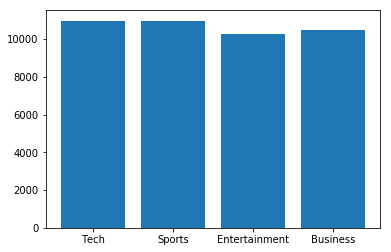

In [18]:
y=[10969,10929,10241,10462]
x=['Tech','Sports','Entertainment','Business']
plt.bar(x,y)

# Word Count

In [19]:
dff['word_count_a']=dff['content'].apply(lambda x:len(str(x).split(' ')))
dff.head()

class                                            content  \
0  business  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  business  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  business  NEW DELHI: The telecom department has not refe...   
3  business  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  business  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines  \
0  Airtel, RIL, 3 others may submit bids for RCom...   
1  Ujjivan Small Finance Bank IPO garners strong ...   
2  Not referred floor price issue to Trai: DoT so...   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...   
4                 Aditya Ghosh elevated to Oyo board   

                                        preprocessed  word_count_a  
0  new nov bharti reliance industry three others ...           367  
1  new dec ujjivan small finance initial public o...           258  
2  new telecom department referred issue fixing f...           100  
3  ipo ujjivan small finance bank closed subscrib...           183  
4  oyo hotel home elevated india south asia ceo a...           275

In [20]:
dff['word_count_a'].sum()

3707559

# Apply preprocessing category wise to know top unigrams and bigrams

# For Business

In [21]:
stop=set(stopwords.words('english'))
len(stop)

179

In [22]:
df1['preprocessed_text']=df1['content'].apply(preprocessing)
df1.head()

content  \
0  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  NEW DELHI: The telecom department has not refe...   
3  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines     class  \
0  Airtel, RIL, 3 others may submit bids for RCom...  business   
1  Ujjivan Small Finance Bank IPO garners strong ...  business   
2  Not referred floor price issue to Trai: DoT so...  business   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...  business   
4                 Aditya Ghosh elevated to Oyo board  business   

                                   preprocessed_text  
0  new nov bharti reliance industry three others ...  
1  new dec ujjivan small finance initial public o...  
2  new telecom department referred issue fixing f...  
3  ipo ujjivan small finance bank closed subscrib...  
4  oyo hotel home elevated india south asia ceo a...

# Most Common Bigrams for Business

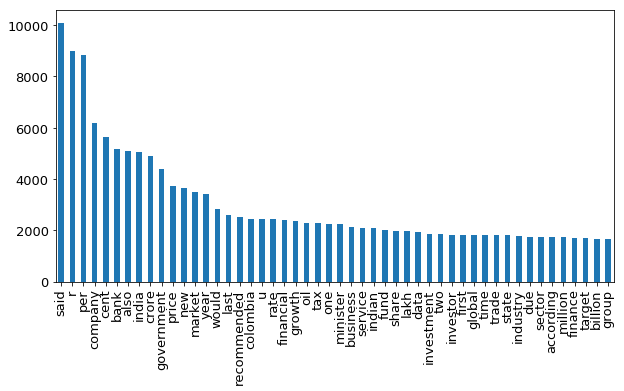

In [23]:
s=pd.Series(''.join(df1['preprocessed_text']).split()).value_counts()[:50]
s.plot('bar',figsize=(10,5),fontsize=13)

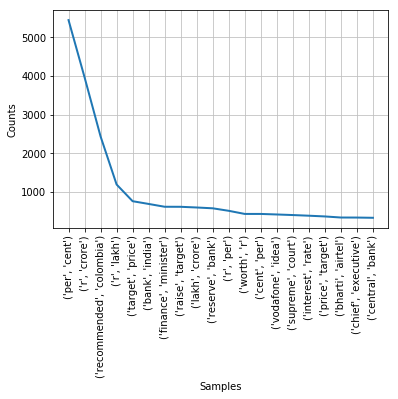

In [24]:
business_corpus=''.join(df1.preprocessed_text)
bigrams=list(nltk.bigrams(business_corpus.split()))
f=nltk.FreqDist(bigrams)
f.plot(20)

# What does it indicate?

In [25]:
t=nltk.tokenize.WhitespaceTokenizer()
b=Text(t.tokenize(business_corpus))
r=b[0:10000]
bu_c=' '.join(r)

In [26]:
bu_c

'new nov bharti reliance industry three others likely bid asset reliance communication according source close last date submit bid end monday rcom committee creditor also meet day open according five bidder expected submit bid rcom asset reliance industry submit bid bharti airtel reliance uv asset reconstruction company among main contender rcom source aware development told bharti withdrawn earlier bid coc granted extension submission putting fresh source bidder submitting separate bid rtl minimum nine bid four another source uvarcl earlier bid aircel private equity firm squared capital bidding data centre optic fibre source secured debt estimated around r lender submitted claim around r crore per nclt resolution professional complete process rcom past tried sell asset various including reliance clear debt deal reliance jio cancelled agreement buy rcom including want bear past liability insolvency proceeding rcom started plea filed swedish telecom gear maker ericsson company failed cl

In [27]:
b.count('reliance')

597

In [28]:
b.count('airtel')

523

In [29]:
b.count('jio')

296

In [30]:
b.count('idea')

645

<BarContainer object of 4 artists>

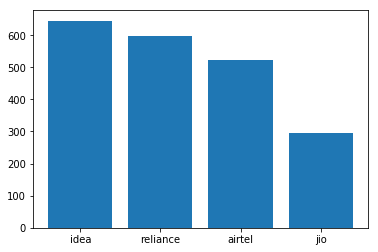

In [31]:
x=['idea','reliance','airtel','jio']
y=[645,597,523,296]
plt.bar(x,y)

In [32]:
len(business_corpus)

6847499

In [35]:
# import spacy
# import en_core_web_sm
# plt.figsize=(20,20)
# nlp=en_core_web_sm.load()
# doc=nlp(bu_c)
# ne=doc.ents
# p=nltk.FreqDist(ne)
# p.plot(50)
# p.most_common(50)

# For Entertainment

In [33]:
df2['preprocessed_text']=df2['content'].apply(preprocessing)
df2.head()

headlines  \
0  Koffee With Karan 6 preview: Kartik Aaryan, Kr...   
1  UMG pre-Grammy showcase features Post Malone, ...   
2  YouTube star Lilly Singh shares new photos fro...   
3  My Name Is RaGa teaser: This Rahul Gandhi biop...   
4  Director Bala reveals why he is no longer helm...   

                                             content          class  \
0  Luka Chuppi actors Kartik Aaryan and Kriti San...  Entertainment   
1  Post Malone, who is competing for record and a...  Entertainment   
2  Priyanka Chopra and Nick Jonasâ wedding was ...  Entertainment   
3  Indian cinema has seen a flurry of politics-ti...  Entertainment   
4  National Award-winning director Bala on Saturd...  Entertainment   

                                   preprocessed_text  
0  luka chuppi actor kartik aaryan kriti sanon gr...  
1  post competing record album year closed univer...  
2  priyanka chopra nick wedding one biggest event...  
3  indian cinema seen flurry biographical film sa...  
4  national director bala saturday said relieved ...

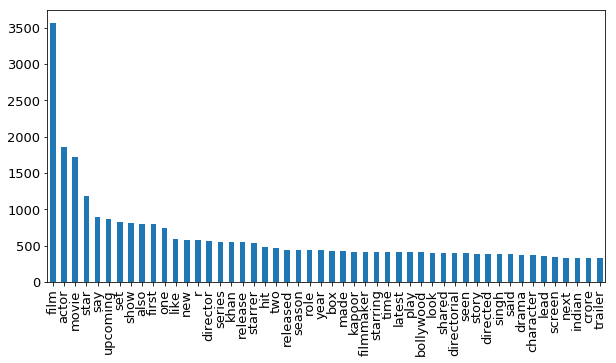

In [34]:
s2=pd.Series(''.join(df2['preprocessed_text']).split()).value_counts()[:50]
s2.plot('bar',figsize=(10,5),fontsize=13)

# Common bigrams for Entertainment

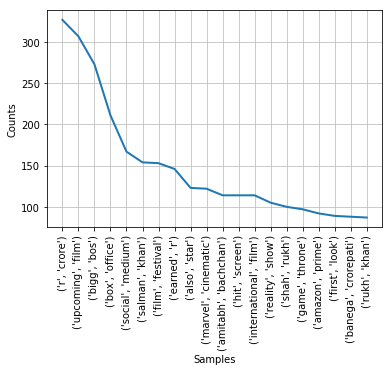

In [35]:
entertainment_corpus=''.join(df2.preprocessed_text)
bigrams=list(nltk.bigrams(entertainment_corpus.split()))
f=nltk.FreqDist(bigrams)
f.plot(20)

In [39]:
# t=nltk.tokenize.WhitespaceTokenizer()
# ent=Text(t.tokenize(entertainment_corpus))
# # r=c[0:10000]
# # e_c=' '.join(r)

In [40]:
# nlp=en_core_web_sm.load()
# doc=nlp(e_c)
# ne=doc.ents
# p=nltk.FreqDist(ne)
# p.plot(50)
# p.most_common(50)

# For Sports

In [36]:
df3['preprocessed_text']=df3['content'].apply(preprocessing)
df3.head()

headlines  \
0  Rex Singh 's 8 for 22 puts Manipur in strong p...   
1  Super Bowl LII 2018: Key Highlights from US Ba...   
2  Ranji Trophy: Padikkal, Deshpande steer Karnat...   
3  Rishabh Pant needs time to mature, says Kevin ...   
4  Recovering from shoulder injury, Rohan Bopanna...   

                                             content   class  \
0  KOLKATA: Left-arm seamer Rex Singh picked up 8...  Sports   
1  * Final Score - Eagles 41, Patriots 33\n\n\n* ...  Sports   
2  DINDIGUL (TN): Half centuries by in-form batsm...  Sports   
3  NEW DELHI: Former England captain Kevin Pieter...  Sports   
4  MUMBAI: Forced out of India's recent Davis Cup...  Sports   

                                   preprocessed_text  
0  seamer rex singh picked manipur bowled mizoram...  
1  final score eagle patriot philadelphia eagle w...  
2  dindigul half century batsman devdutt padikkal...  
3  new former england captain kevin pietersen bel...  
4  forced recent davis cup tie due shoulder doubl...

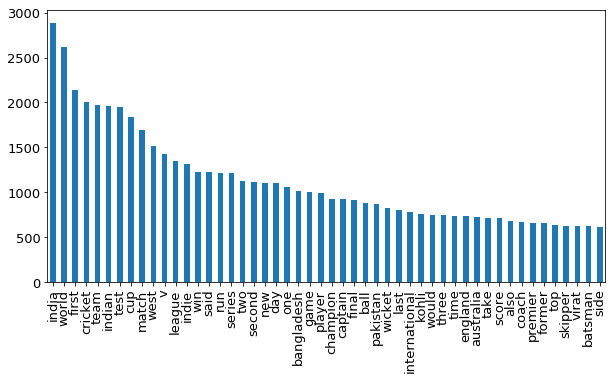

In [37]:
s3=pd.Series(''.join(df3['preprocessed_text']).split()).value_counts()[:50]
s3.plot('bar',figsize=(10,5),fontsize=13)

# Common bigrams in sports

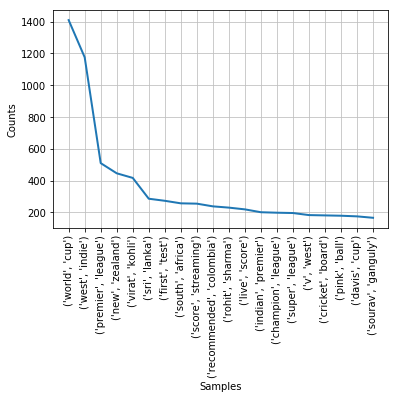

In [38]:
sports_corpus=''.join(df3.preprocessed_text)
bigrams=list(nltk.bigrams(sports_corpus.split()))
f=nltk.FreqDist(bigrams)
f.plot(20)

In [39]:
t=nltk.tokenize.WhitespaceTokenizer()
sp=Text(t.tokenize(sports_corpus))
# r=b[0:10000]
# bu_c=' '.join(r)

In [40]:
sp.count('cricket')

2001

In [41]:
sp.count('football')

346

In [42]:
sp.count('tennis')

230

In [43]:
sp.count('hockey')

123

<BarContainer object of 4 artists>

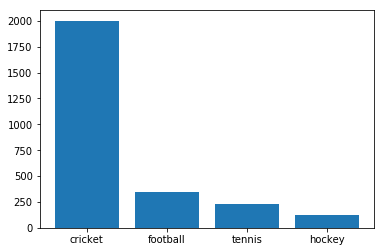

In [44]:
x=['cricket','football','tennis','hockey']
y=[2001,346,230,123]
plt.bar(x,y)

# Tech

In [45]:
df4['preprocessed_text']=df4['content'].apply(preprocessing)
df4.head()

content  \
0  Hotstar, the leading Over The Top (OTT) conten...   
1  Samsung is working to revamp its 2020 Galaxy A...   
2  PUBG Mobile Club Open (PMCO) 2019 Fall Split j...   
3  Reliance Jio has scrapped the Rs 49 prepaid pl...   
4  Reliance Jio on Sunday announced that it will ...   

                                           headlines class  \
0  Hotstar crosses 400 million downloads in 2019,...  Tech   
1  Samsung Galaxy A11, A31, A41 to come with more...  Tech   
2  PUBG Mobile Club Open 2020 Spring Split: Every...  Tech   
3  Reliance Jio hikes JioPhone Rs 49 plan price t...  Tech   
4  Jio to hike mobile calling, data charges by up...  Tech   

                                   preprocessed_text  
0  leading top content platform released annual w...  
1  samsung working revamp galaxy smartphones new ...  
2  pubg mobile club open fall split came end bige...  
3  reliance jio scrapped r prepaid plan jiophone ...  
4  reliance jio sunday announced launching new un...

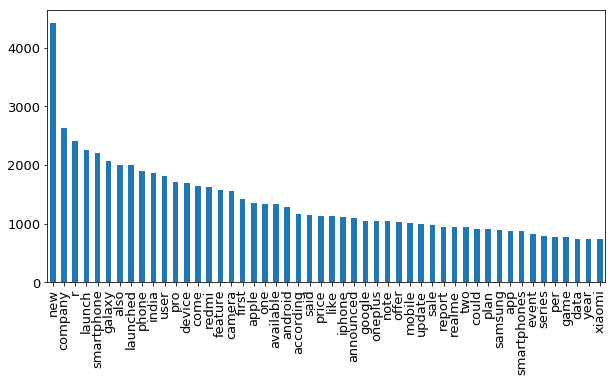

In [46]:
s4=pd.Series(''.join(df4['preprocessed_text']).split()).value_counts()[:50]
s4.plot('bar',figsize=(10,5),fontsize=13)

# Most Common bigrams in tech

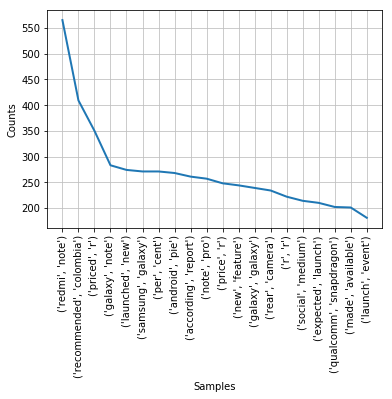

In [47]:
tech_corpus=''.join(df4.preprocessed_text)
bigrams=list(nltk.bigrams(tech_corpus.split()))
f=nltk.FreqDist(bigrams)
f.plot(20)

In [48]:
t=nltk.tokenize.WhitespaceTokenizer()
tech=Text(t.tokenize(tech_corpus))

# Model Building

# Label Encoding Target variables

In [49]:
from sklearn.preprocessing import LabelEncoder
dff['Labels']=LabelEncoder().fit_transform(dff['class'])
dff.head()

class                                            content  \
0  business  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  business  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  business  NEW DELHI: The telecom department has not refe...   
3  business  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  business  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines  \
0  Airtel, RIL, 3 others may submit bids for RCom...   
1  Ujjivan Small Finance Bank IPO garners strong ...   
2  Not referred floor price issue to Trai: DoT so...   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...   
4                 Aditya Ghosh elevated to Oyo board   

                                        preprocessed  word_count_a  Labels  
0  new nov bharti reliance industry three others ...           367       3  
1  new dec ujjivan small finance initial public o...           258       3  
2  new telecom department referred issue fixing f...           100       3  
3  ipo ujjivan small finance bank closed subscrib...           183       3  
4  oyo hotel home elevated india south asia ceo a...           275       3

# Convert the dataframe to CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dff['preprocessed'].tolist())
X_train_counts.shape

(42601, 44640)

In [51]:
y=dff['Labels']
x=X_train_counts

# MultinomialNB

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
mn1=MultinomialNB()
mn1.fit(X_train,Y_train)
y_pred=mn1.predict(X_test)
score=metrics.accuracy_score(Y_test,y_pred)
print(score)

0.9493017251496303


In [53]:
mn1.predict_proba(X_train)

array([[1.85731789e-26, 4.09829255e-31, 1.00000000e+00, 6.45480350e-13],
       [1.26745876e-35, 1.00000000e+00, 4.32959618e-36, 1.24661397e-38],
       [3.96610540e-11, 1.00000000e+00, 1.11658143e-14, 2.60187552e-14],
       ...,
       [7.02848631e-19, 1.00000000e+00, 4.67327799e-18, 2.51038152e-17],
       [1.96008189e-23, 2.87771735e-29, 1.00000000e+00, 3.32675179e-23],
       [1.00000000e+00, 2.31732744e-28, 2.11269252e-28, 2.45061327e-33]])

In [54]:
mn1.predict_proba(X_test)

array([[9.99939124e-01, 3.66439550e-13, 6.08755878e-05, 4.96791560e-13],
       [1.70441030e-01, 9.31818157e-04, 2.62060576e-03, 8.26006546e-01],
       [4.01820489e-86, 1.18607508e-98, 1.38625674e-71, 1.00000000e+00],
       ...,
       [3.84405110e-21, 1.13516710e-29, 1.00000000e+00, 5.82207886e-12],
       [1.00000000e+00, 9.45812474e-19, 1.30105203e-23, 3.15862261e-26],
       [5.36582151e-21, 1.00000000e+00, 9.13976557e-28, 5.22556538e-36]])

In [55]:
print(mn1.score(X_test,Y_test))#####testing accuracy
print(mn1.score(X_train,Y_train))####trainig accuracy

0.9493017251496303
0.9609154929577465


# CLASSIFICATION REPORT

In [56]:
print(metrics.classification_report(Y_test,y_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y_pred)

               precision    recall  f1-score   support

         Tech       0.95      0.98      0.96      2069
       Sports       0.97      0.98      0.97      2168
Entertainment       0.96      0.89      0.92      2171
     Business       0.91      0.96      0.94      2113

     accuracy                           0.95      8521
    macro avg       0.95      0.95      0.95      8521
 weighted avg       0.95      0.95      0.95      8521



array([[2020,   23,   11,   15],
       [  20, 2116,   14,   18],
       [  55,   31, 1930,  155],
       [  27,    3,   60, 2023]], dtype=int64)

# Support Vector Machine

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
#create SVM classifier
SVM1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
SVM1.fit(X_train,Y_train)
#predict response
SVM_pred=SVM1.predict(X_test)
score=metrics.accuracy_score(Y_test,SVM_pred)
print(score)
print()
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(SVM_pred, Y_test)*100)

0.9569299378007277

SVM Accuracy Score ->  95.69299378007277


# CLASSIFICATION REPORT

In [58]:
print(metrics.classification_report(Y_test,y_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y_pred)

               precision    recall  f1-score   support

         Tech       0.95      0.98      0.96      2069
       Sports       0.97      0.98      0.97      2168
Entertainment       0.96      0.89      0.92      2171
     Business       0.91      0.96      0.94      2113

     accuracy                           0.95      8521
    macro avg       0.95      0.95      0.95      8521
 weighted avg       0.95      0.95      0.95      8521



array([[2020,   23,   11,   15],
       [  20, 2116,   14,   18],
       [  55,   31, 1930,  155],
       [  27,    3,   60, 2023]], dtype=int64)

In [59]:
print(SVM1.score(X_test,Y_test))#####testing accuracy
print(SVM1.score(X_train,Y_train))####trainig accuracy

0.9569299378007277
0.9980340375586855


# Converting the dataframe to TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x2 = v.fit_transform(dff['preprocessed'])
y2=dff['Labels']

# MultinomialNB

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
#create multinomial classifier
mn2=MultinomialNB()
mn2.fit(X_train,Y_train)
#predict response
y2_pred=mn2.predict(X_test)
score=metrics.accuracy_score(Y_test,y2_pred)
print(score)

0.9559910808590542


In [62]:
mn2.predict_proba(x2)

array([[2.00158969e-06, 4.49913442e-06, 1.33120154e-04, 9.99860379e-01],
       [8.50379439e-06, 4.68881910e-06, 1.93440584e-04, 9.99793367e-01],
       [1.03519234e-04, 1.86640362e-04, 5.96410761e-02, 9.40068764e-01],
       ...,
       [3.41961818e-06, 9.27520625e-07, 9.99944824e-01, 5.08288407e-05],
       [1.45290810e-03, 3.55456085e-04, 9.93354862e-01, 4.83677397e-03],
       [3.84928289e-03, 3.03458200e-03, 9.54841500e-01, 3.82746355e-02]])

In [63]:
print(mn2.score(X_test,Y_test))#####testing accuracy
print(mn2.score(X_train,Y_train))####trainig accuracy

0.9559910808590542
0.966255868544601


# CLASSIFICATION REPORT

In [64]:
print(metrics.classification_report(Y_test,y2_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y2_pred)

               precision    recall  f1-score   support

         Tech       0.97      0.96      0.97      2069
       Sports       0.97      0.98      0.97      2168
Entertainment       0.95      0.92      0.94      2171
     Business       0.93      0.96      0.95      2113

     accuracy                           0.96      8521
    macro avg       0.96      0.96      0.96      8521
 weighted avg       0.96      0.96      0.96      8521



array([[1993,   36,   17,   23],
       [  13, 2122,   16,   17],
       [  29,   29, 1999,  114],
       [  11,    2,   68, 2032]], dtype=int64)

# Support Vector Machine

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.2,random_state=10)
#create SVM classifier
SVM2 = svm.SVC(C=1.0, kernel='linear', degree=3,gamma='auto',probability=True)
SVM2.fit(X_train,Y_train)
#predict response
SVM_pred=SVM2.predict(X_test)
score=metrics.accuracy_score(Y_test,SVM_pred)
print(score)
print()
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(SVM_pred, Y_test)*100)

0.9669052928060087

SVM Accuracy Score ->  96.69052928060087


In [66]:
SVM2.predict_proba(x2)

array([[1.64136871e-09, 1.29737716e-09, 1.87105345e-09, 9.99999995e-01],
       [5.73275453e-09, 3.65514513e-09, 6.36624043e-09, 9.99999984e-01],
       [4.90780024e-06, 4.11938012e-06, 2.96370915e-03, 9.97027264e-01],
       ...,
       [4.88782842e-12, 3.17897395e-12, 9.99997727e-01, 2.27282436e-06],
       [1.95367103e-04, 1.16741606e-04, 9.85451299e-01, 1.42365923e-02],
       [2.18840657e-03, 2.56262549e-05, 9.85335760e-01, 1.24502069e-02]])

In [67]:
print(SVM2.score(X_test,Y_test))#####testing accuracy
print(SVM2.score(X_train,Y_train))####trainig accuracy

0.9669052928060087
0.9906103286384976


# CLASSIFICATION REPORT

In [68]:
print(metrics.classification_report(Y_test,SVM_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,SVM_pred)

               precision    recall  f1-score   support

         Tech       0.96      0.98      0.97      2069
       Sports       0.98      0.98      0.98      2168
Entertainment       0.95      0.95      0.95      2171
     Business       0.97      0.96      0.96      2113

     accuracy                           0.97      8521
    macro avg       0.97      0.97      0.97      8521
 weighted avg       0.97      0.97      0.97      8521



array([[2027,   21,   19,    2],
       [  21, 2127,   13,    7],
       [  47,   12, 2063,   49],
       [  20,    3,   68, 2022]], dtype=int64)

# Using Headlines Classify news articles into different categories

In [69]:
dff.columns

Index(['class', 'content', 'headlines', 'preprocessed', 'word_count_a',
       'Labels'],
      dtype='object')

In [70]:
dff['headlines']

0        Airtel, RIL, 3 others may submit bids for RCom...
1        Ujjivan Small Finance Bank IPO garners strong ...
2        Not referred floor price issue to Trai: DoT so...
3        Ujjivan Small Finance Bank IPO subscribed 170 ...
4                       Aditya Ghosh elevated to Oyo board
5        GST Stakeholder Feedback Diwas for new GST ret...
6        SoftBank's Oyo reveals over $330 million annua...
7        Top deck churn at Cipla over âunclearâ str...
8                     Ola plans to slash jobs ahead of IPO
9           IHG appoints Sudeep Jain as South West Asia MD
10       Karnataka Bank reports Rs 40.39 crore fraud by...
11       AARK World acquires fashion rental portal Flyrobe
12       Gadkari rues hurdles being faced in road proje...
13       Auto industry problems essentially derived fro...
14       CIC issues show-cause notice to RBI for casual...
15       Jeep Compass Trailhawk review: Jeep's 'all-roa...
16       Finance minister introduces Bill in Lok Sabha .

In [71]:
dff.shape

(42601, 6)

In [72]:
def preprocessing2(text2):
    stop=set(stopwords.words('english'))
    lowers=[word.lower() for word in str(text2).split()]
    token=[i for i in lowers if i not in stop]
    alpha=[word for word in token if word.isalpha()]
    lemma=WordNetLemmatizer()
    l=[lemma.lemmatize(i) for i in alpha ]
    text2=' '.join(l)
    return text2

In [73]:
dff['preprocessed2']=dff['headlines'].apply(preprocessing2)

In [74]:
dff['preprocessed2'].head()

0              others may submit bid rcom asset monday
1    ujjivan small finance bank ipo garner strong i...
2                referred floor price issue dot source
3       ujjivan small finance bank ipo subscribed time
4                      aditya ghosh elevated oyo board
Name: preprocessed2, dtype: object

# Preprocessing

In [75]:
corpus2=''.join(dff.preprocessed2)
len(corpus2)

1962610

In [76]:
dff['word_count_headline']=dff['headlines'].apply(lambda x:len(str(x).split(' ')))
dff.head()

class                                            content  \
0  business  New Delhi, Nov 24 () Bharti Airtel, Reliance I...   
1  business  New Delhi, Dec 4 () Ujjivan Small Finance Bank...   
2  business  NEW DELHI: The telecom department has not refe...   
3  business  MUMBAI: The IPO of Ujjivan Small Finance Bank ...   
4  business  BENGALURU: Oyo Hotels & Homes has elevated Ind...   

                                           headlines  \
0  Airtel, RIL, 3 others may submit bids for RCom...   
1  Ujjivan Small Finance Bank IPO garners strong ...   
2  Not referred floor price issue to Trai: DoT so...   
3  Ujjivan Small Finance Bank IPO subscribed 170 ...   
4                 Aditya Ghosh elevated to Oyo board   

                                        preprocessed  word_count_a  Labels  \
0  new nov bharti reliance industry three others ...           367       3   
1  new dec ujjivan small finance initial public o...           258       3   
2  new telecom department referred issue fixing f...           100       3   
3  ipo ujjivan small finance bank closed subscrib...           183       3   
4  oyo hotel home elevated india south asia ceo a...           275       3   

                                       preprocessed2  word_count_headline  
0            others may submit bid rcom asset monday                   12  
1  ujjivan small finance bank ipo garner strong i...                   14  
2              referred floor price issue dot source                    9  
3     ujjivan small finance bank ipo subscribed time                    8  
4                    aditya ghosh elevated oyo board                    6

In [77]:
len(dff["headlines"])

42601

In [78]:
dff['word_count_headline'].sum()

485401

# Convert the dataframe to CountVectorizer

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts_vec = count_vect.fit_transform(dff['preprocessed2'].tolist())
X_train_counts_vec.shape

(42601, 20118)

In [80]:
y3=dff['Labels']
x3=X_train_counts_vec

# MultinomialNB

In [81]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(x3,y3,test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(X_train,Y_train)
y_pred=mn.predict(X_test)
score=metrics.accuracy_score(Y_test,y_pred)
print(score)

0.9446074404412628


In [82]:
print(mn.score(X_test,Y_test))#####testing accuracy
print(mn.score(X_train,Y_train))####trainig accuracy

0.9446074404412628
0.9655516431924883


# CLASSIFICATION REPORT

In [83]:
print(metrics.classification_report(Y_test,y_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y_pred)

               precision    recall  f1-score   support

         Tech       0.97      0.94      0.95      2069
       Sports       0.96      0.97      0.96      2168
Entertainment       0.92      0.94      0.93      2171
     Business       0.93      0.93      0.93      2113

     accuracy                           0.94      8521
    macro avg       0.95      0.94      0.94      8521
 weighted avg       0.94      0.94      0.94      8521



array([[1944,   57,   37,   31],
       [  22, 2109,   14,   23],
       [  20,   19, 2041,   91],
       [  20,   22,  116, 1955]], dtype=int64)

# Support Vector Machine

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(x3,y3,test_size=0.2,random_state=10)
#create SVM classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,Y_train)
#predict response
SVM_pred=SVM.predict(X_test)
score=metrics.accuracy_score(Y_test,SVM_pred)
print(score)
print()
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(SVM_pred, Y_test)*100)

0.9494190822673395

SVM Accuracy Score ->  94.94190822673396


In [85]:
print(SVM.score(X_test,Y_test))#####testing accuracy
print(SVM.score(X_train,Y_train))####trainig accuracy

0.9494190822673395
0.995862676056338


# CLASSIFICATION REPORT

In [86]:
print(metrics.classification_report(Y_test,y_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y_pred)

               precision    recall  f1-score   support

         Tech       0.97      0.94      0.95      2069
       Sports       0.96      0.97      0.96      2168
Entertainment       0.92      0.94      0.93      2171
     Business       0.93      0.93      0.93      2113

     accuracy                           0.94      8521
    macro avg       0.95      0.94      0.94      8521
 weighted avg       0.94      0.94      0.94      8521



array([[1944,   57,   37,   31],
       [  22, 2109,   14,   23],
       [  20,   19, 2041,   91],
       [  20,   22,  116, 1955]], dtype=int64)

# Converting the dataframe to TF-IDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x4 = v.fit_transform(dff['preprocessed2'])
y4=dff['Labels']

# MultinomialNB

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(x4,y4,test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
#create multinomial classifier
mn=MultinomialNB()
mn.fit(X_train,Y_train)
#predict response
y4_pred=mn.predict(X_test)
score=metrics.accuracy_score(Y_test,y4_pred)
print(score)

0.9434338692641708


In [ ]:
y4_pred

In [89]:
print(mn.score(X_test,Y_test))#####testing accuracy
print(mn.score(X_train,Y_train))####trainig accuracy

0.9434338692641708
0.9664319248826291


# CLASSIFICATION REPORT

In [90]:
print(metrics.classification_report(Y_test,y4_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,y4_pred)

               precision    recall  f1-score   support

         Tech       0.98      0.93      0.95      2069
       Sports       0.95      0.98      0.96      2168
Entertainment       0.92      0.94      0.93      2171
     Business       0.94      0.92      0.93      2113

     accuracy                           0.94      8521
    macro avg       0.94      0.94      0.94      8521
 weighted avg       0.94      0.94      0.94      8521



array([[1924,   71,   44,   30],
       [  16, 2115,   17,   20],
       [  18,   22, 2046,   85],
       [  14,   20,  125, 1954]], dtype=int64)

# Support Vector Machine

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(x4,y4,test_size=0.2,random_state=10)
#create SVM classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,Y_train)
#predict response
SVM_pred=SVM.predict(X_test)
score=metrics.accuracy_score(Y_test,SVM_pred)
print(score)
print()
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(SVM_pred, Y_test)*100)

0.9557563666236357

SVM Accuracy Score ->  95.57563666236358


In [92]:
print(SVM.score(X_test,Y_test))#####testing accuracy
print(SVM.score(X_train,Y_train))####trainig accuracy

0.9557563666236357
0.987118544600939


# CLASSIFICATION REPORT

In [93]:
print(metrics.classification_report(Y_test,SVM_pred,target_names=['Tech','Sports','Entertainment','Business']))
metrics.confusion_matrix(Y_test,SVM_pred)

               precision    recall  f1-score   support

         Tech       0.94      0.96      0.95      2069
       Sports       0.98      0.98      0.98      2168
Entertainment       0.96      0.94      0.95      2171
     Business       0.94      0.94      0.94      2113

     accuracy                           0.96      8521
    macro avg       0.96      0.96      0.96      8521
 weighted avg       0.96      0.96      0.96      8521



array([[1992,   34,   18,   25],
       [  30, 2114,    5,   19],
       [  43,    9, 2047,   72],
       [  44,    6,   72, 1991]], dtype=int64)

# LDA

In [94]:
stop=set(stopwords.words('english'))
dff['lst']=dff['preprocessed'].apply(lambda x: [i for i in x.split() if i not in stop])

In [95]:
dff["lst"]

0        [new, nov, bharti, reliance, industry, three, ...
1        [new, dec, ujjivan, small, finance, initial, p...
2        [new, telecom, department, referred, issue, fi...
3        [ipo, ujjivan, small, finance, bank, closed, s...
4        [oyo, hotel, home, elevated, india, south, asi...
5        [new, dec, central, state, authority, organise...
6        [oyo, hotel, loss, ballooned, year, revenue, v...
7        [rupali, mukherjee, tnn, domestic, pharma, maj...
8        [new, major, ola, planning, cut, workforce, ne...
9        [new, nov, hospitality, major, intercontinenta...
10       [new, private, lender, karnataka, bank, wednes...
11       [aark, world, owns, operates, rent, bae, renta...
12       [new, dec, union, minister, nitin, gadkari, ex...
13       [new, finance, minister, nirmala, sitharaman, ...
14       [new, dec, central, information, commission, i...
15       [new, given, kind, car, would, choose, weekend...
16       [new, finance, minister, nirmala, sitharaman, .

In [96]:
corpus=''.join(dff.preprocessed)
len(corpus)

12413322

# Create Corpus and dictionary for topic modelling

In [97]:
# bigrams=list(nltk.bigrams(corpus.split()))
id2word = gensim.corpora.Dictionary(dff.lst)

In [98]:
bigram = gensim.models.Phrases(dff.lst, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [99]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [100]:
data_words_bigrams = make_bigrams(dff.lst)
texts=data_words_bigrams
corp = [id2word.doc2bow(text) for text in texts]
print(corp[:1])

[[(0, 2), (1, 1), (2, 1), (4, 1), (6, 1), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 1), (14, 2), (15, 8), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (29, 3), (30, 1), (32, 1), (33, 1), (34, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 2), (64, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (87, 1), (89, 1), (91, 1), (94, 1), (95, 3), (96, 7), (97, 1), (99, 4), (100, 1), (102, 1), (104, 1), (105, 1), (106, 1), (107, 5), (108, 1), (109, 1), (111, 1), (112, 3), (113, 1), (114, 1), (116, 1), (117, 1), (119, 1), (120, 1), (121, 1), (122, 1), (124, 1), (125, 1), (126, 1), (127, 1)]]


# model building

In [101]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corp,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [102]:
print(lda_model.print_topics())

[(0, '0.017*"india" + 0.016*"would" + 0.015*"one" + 0.013*"could" + 0.011*"may" + 0.010*"work" + 0.010*"indian" + 0.010*"u" + 0.009*"either" + 0.008*"step"'), (1, '0.030*"google" + 0.023*"service" + 0.021*"user" + 0.019*"company" + 0.014*"said" + 0.013*"reported" + 0.011*"according" + 0.011*"plan" + 0.010*"report" + 0.009*"app"'), (2, '0.035*"new" + 0.019*"launch" + 0.017*"smartphone" + 0.015*"launched" + 0.015*"galaxy" + 0.014*"device" + 0.014*"phone" + 0.012*"apple" + 0.012*"pro" + 0.012*"streaming"'), (3, '0.126*"r" + 0.067*"price" + 0.044*"per" + 0.024*"note" + 0.020*"cent" + 0.013*"vodafone" + 0.012*"cost" + 0.011*"cut" + 0.010*"total" + 0.010*"prepaid"')]


In [103]:
print('\nPerplexity: ', lda_model.log_perplexity(corp))


Perplexity:  -9.206402505390074


In [104]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4389360221963981


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,corp,id2word)
pyLDAvis.show(vis)

C:\Users\DELL\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [22/Feb/2020 12:10:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2020 12:10:30] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2020 12:10:31] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2020 12:10:31] "GET /LDAvis.js HTTP/1.1" 200 -
